# CMPS 320
## Lab 4:  Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import statsmodels.formula.api as smf     


# plot the graph directly in the notebook
%matplotlib inline

In this Lab, we will be using an Advertising data set. The data set consists of the sales of products in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

### Step 1: Acquire Data and Data Preparation

In [2]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4]) # load data  
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.head()    # advertising.tail() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.describe() # Check summary statistics

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advertising.shape # Check data dimension

(200, 4)

### Step 2: Some Exploration Data Analysis (EDA)

It is a good practise to examine the characteristics of the data before modeling.

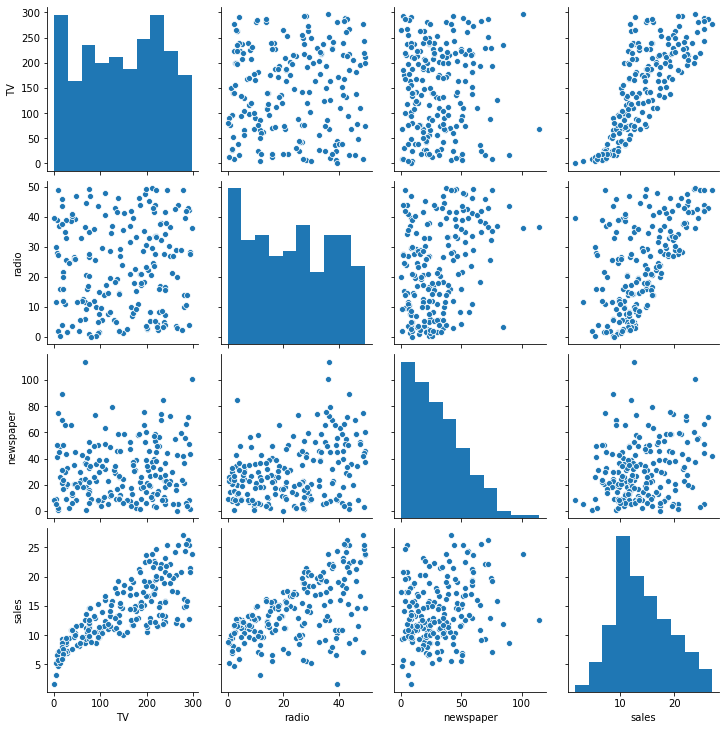

In [6]:
# View the scatter plot of features using the seaborne package

sn.pairplot(advertising)

C:\Users\joshi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


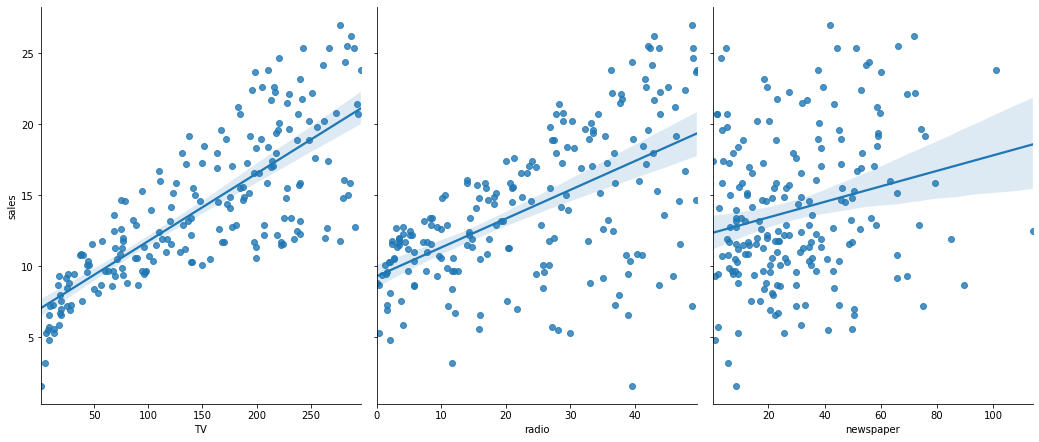

In [7]:
# Represent only the relationship between 'Sales' and features as a scatterplot,
# Display the regression line and 95% confidence band as in R's ggplot ('kind='reg').

sn.pairplot(data = advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=6, aspect=0.8, kind='reg')

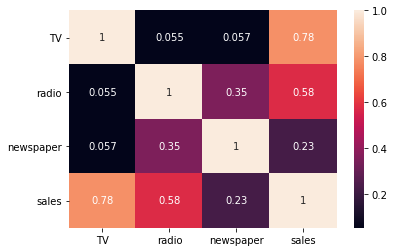

In [8]:
# CORRELATION MATRIX
corrMatrix = advertising.corr() 
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Step 3: Fitting a Simple Linear Regression model

In [13]:
#1. Model import: The module containing the model has already been imported.

# 2. Model Instantiation: Creating a linear regression model using Ordinary Least Squares (ols)

lm = smf.ols(formula='sales ~ TV', data=advertising)

# 'sales' column as response and 'TV' column as feature in 'advertising' DataFrame
# define a linear regression model

# 3. Train the model, and receive the result (learned) model as 'lm_learned'
lm_learned = lm.fit()

# coefficients of the trained model

lm_learned.params

# Note Type lm_learned._Tab_ to see what methods are available 
#for the 'lm_learned' object.
# lm_learned.pvalues            # p values
# lm_learned.rsquared           # R-squared statistic 

Intercept    7.032594
TV           0.047537
dtype: float64

In [14]:
# Usually, the above steps 2 & 3 are chained.
lm = smf.ols(formula='sales ~ TV', data=advertising).fit()

# The trained model (i.e. fit model) is created

In [15]:
print ("Coeffients:\n%s \n\np-values:\n%s , \n\nr-squared: %s " % (lm.params, lm.pvalues, lm.rsquared))

Coeffients:
Intercept    7.032594
TV           0.047537
dtype: float64 

p-values:
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 , 

r-squared: 0.611875050850071 


Interpretation: $$y = \beta_0 + \beta_1x = 7.032 + 0.047  TV$$

$\beta_1 = 0.0475$ : An additional $1000 spent on TV advertising is associated with
selling approximately 47.5 additional units of the product.

The following two cells are another example of visualizing the relationship between response and feature.

We draw a scatter plot with Sales on the Y-axis and TV ad spending on the X-axis.

Text(0.5, 1.0, 'Simple Linear Regression')

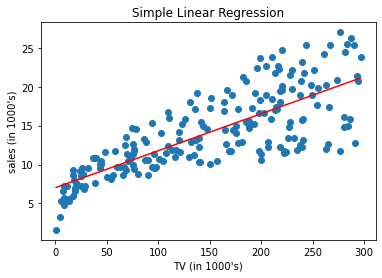

In [20]:
plt.scatter(advertising.TV, advertising.sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("sales (in 1000's)")

# Overlay the simple regression line on the above ploty 
X = pd.DataFrame({'TV':[advertising.TV.min(), advertising.TV.max()]})
Y_pred = lm.predict(X)
plt.plot(X, Y_pred, c='red')
plt.title("Simple Linear Regression")

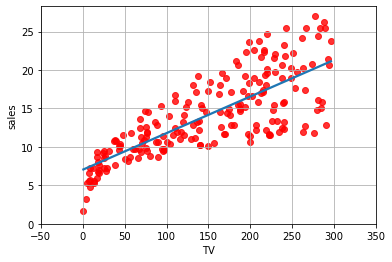

In [21]:
# You can also use the seaborn package

sn.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-50,350)
plt.ylim(ymin=0)
plt.grid()

In [22]:
lm.summary()  # Full summary of the model. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        02:29:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Utilizing a Learned Model***: Prediction and Related Issues

The model lm created above was created using only the TV variable of Advertising as a feature.
The above R-squared value of 0.612 or Residual is the training performance obtained using the data (training set) used to create the model.

The goal of predictive analysis is not to create a model that performs well on the training set, but rather to create a model that is likely to perform well on the first (future) out-of-sample data (i.e., by generalizing well)

Prediction: When giving a new predictor value (TV) using the created model (lm), what is the prediction of 'Sales'?
For example, predict Sales when TV = 100

In [23]:
# The statsmodel formula interface should provide input as an array data structure such as a pandas DataFrame
x_new = pd.DataFrame({'TV': [100]}) # Generic way to create a df from a dictionary
# x_new.info()
x_new.head()

,TV
0,100


Prediction: Using the 'predict' method as shown below
** The input of predict() must have features used for training in the form of an array like DataFrame**

In [24]:
lm.predict(x_new) # return the resulting prediction as an ndarray in numpy"

0    11.786258
dtype: float64

In [25]:
X_new = pd.DataFrame({'TV': [100, 422, 74]}) # Sales forecast when TV is 100, 422, or 74?
lm.predict(X_new)

0    11.786258
1    27.093056
2    10.550305
dtype: float64

### Fitting a Multiple Linear Regression model

**multiple linear regression**: Estimate response using multiple features

$Y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

Multiple linear regression with Advertising TV, Radio, and Newspapers as a feature and Sales as the response:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [26]:
lm_mul = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        02:43:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Interpretation of results***

Since the p-value of the F statistic is very small (1.58e-96), the model is valid (at least one variable is related to the response)

The p-values of TV and Radio are meaningful. However, since the p-value of the Newspaper reaches 0.86, the null-hypothesis that "Newspaper is not related to the response" cannot be rejected. Therefore, it is not suitable to include the Newspaper variable in the model.

R-squared increased to 0.89 compared to simple linear regression (0.612). It can be thought that this model at least explains (predicts) the response of the training set better than simple linear regression.

#### Alternative Technique

##### Fitting the linear model

In [27]:
x = advertising.drop(["sales"],axis=1)
y = advertising.sales

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [31]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))# R squared

R squared: 0.8972106381789521


### Checking Assumptions

In [32]:
#### Linearity

C:\Users\joshi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


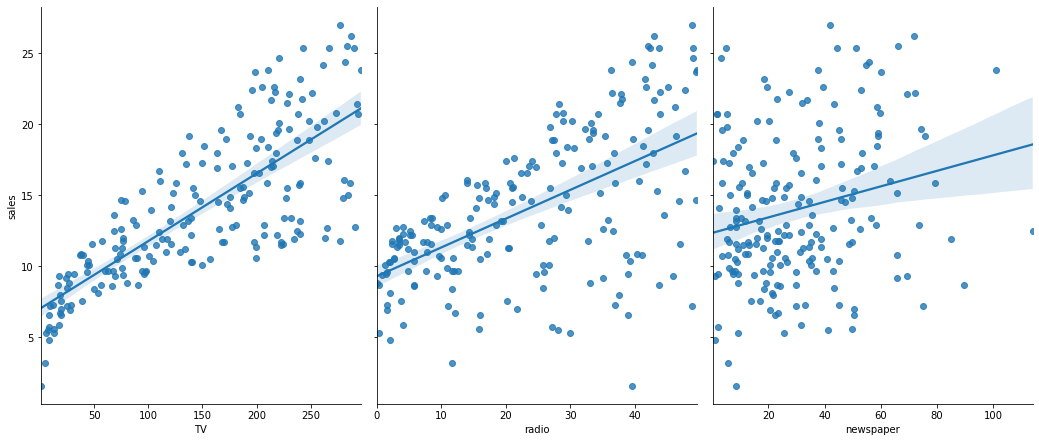

In [33]:
sn.pairplot(data = advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=6, aspect=0.8, kind='reg')

#### Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [34]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.3980817331903383e-16


#### Check for Homoscedasticity

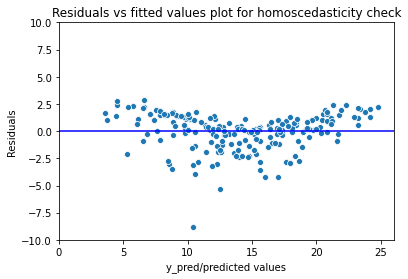

In [35]:
p = sn.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sn.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Detecting heteroscedasticity:
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

In [36]:
# Using Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.3437995226729407), ('p-value', 0.07369564428747238)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

#### Check for Normality of error terms/residuals

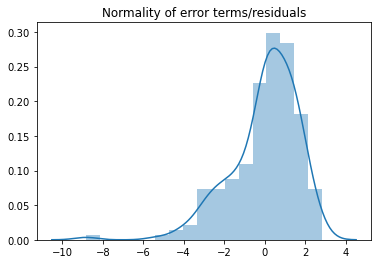

In [37]:
p = sn.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed.

#### Linearity

C:\Users\joshi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


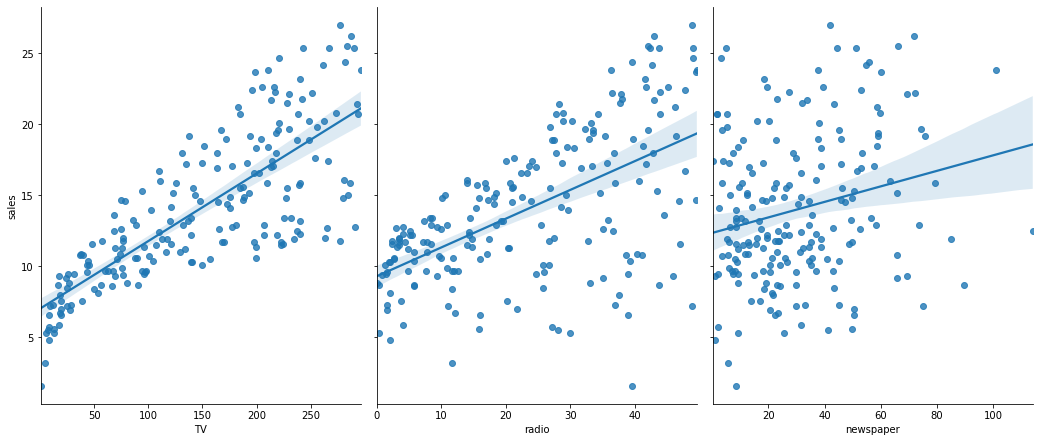

In [38]:
sn.pairplot(data = advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=6, aspect=0.8, kind='reg')